In [1]:
print("hello")

hello


In [2]:
with open('names.txt') as f:
    names = [ line.strip() for line in f.readlines()]

In [3]:
names[:4]

['emma', 'olivia', 'ava', 'isabella']

In [4]:
print(len(names))
print(min(len(n) for n in names))
max(len(n) for n in names)

32033
2


15

In [5]:
b = {}
for n in names:
    chs = ['<S>'] + list(n) + ['<E>']
    for ch1 , ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [6]:
import torch

In [7]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [8]:
chars = ['.'] + sorted(list(set(''.join(names))))
stoi = {s:i for i, s in enumerate(chars)}

In [9]:
for n in names:
    chs = ['.'] + list(n) + ['.']
    for ch1 , ch2 in zip(chs, chs[1:]):
        N[stoi[ch1], stoi[ch2]] += 1

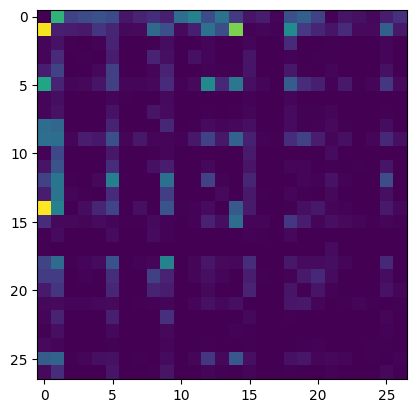

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(N)

In [11]:
N[3, 3]

tensor(42, dtype=torch.int32)

In [12]:
g = torch.Generator().manual_seed(2147483647)

In [13]:
itos = {i:s for s, i in stoi.items()}
itos

{0: '.',
 1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z'}

In [17]:
P = (N+1).float()
P = P / P.sum(1, keepdims=True)

In [18]:
g = torch.Generator().manual_seed(2147483647)
for i in range(20):
    ix = 0
    name = []
    while True:
        p = P[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        if ix == 0:
            break
        name.append(itos[ix])
    print(''.join(name))


mor
axx
minaymoryles
kondlaisah
anchshizarie
odaren
iaddash
h
jhinatien
egushl
h
br
a
jayn
ilemannariaenien
be
f
akiinela
trttanakeroruceyaaxatona
lamoynayrkiedengin


In [19]:

loghood = 0.0
c = 0
for n in names:
    chs = ['.'] + list(n) + ['.']
    for ch1 , ch2 in zip(chs, chs[1:]):
        c += 1
        ix1 = stoi[ch1]
        
        ix2 = stoi[ch2]
        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        loghood += logprob

print(f'{loghood=}')
nll = -loghood / c

print(f'{nll=}')

        # N[ix1, ix2] += 1

loghood=tensor(-559951.5625)
nll=tensor(2.4544)


In [20]:
xs, ys = [] , []
for n in names:
    chs = ['.'] + list(n) + ['.']
    for ch1 , ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)

In [25]:
xs[:5]

tensor([ 0,  5, 13, 13,  1])

In [31]:
import torch.nn.functional as F
xenc = F.one_hot(xs, num_classes=27).float()

In [32]:
xenc.shape

torch.Size([228146, 27])

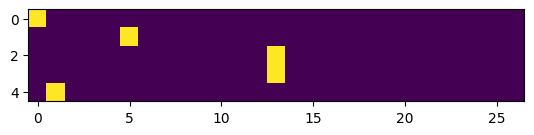

In [33]:
plt.imshow(xenc[:5])

In [34]:
xenc.dtype

torch.float32

In [35]:
W = torch.randn((27,27))
counts = (xenc @ W).exp()
prob = counts / counts.sum(1, keepdims=True)

In [37]:
prob[0]

tensor([0.0110, 0.0240, 0.0512, 0.0365, 0.0317, 0.0086, 0.0154, 0.0075, 0.0361,
        0.1141, 0.0287, 0.0370, 0.0081, 0.0129, 0.0605, 0.0609, 0.0519, 0.0098,
        0.0076, 0.0590, 0.0265, 0.0033, 0.0044, 0.0418, 0.0049, 0.0321, 0.2148])

In [38]:
prob[0].sum()

tensor(1.0000)

In [44]:
g = torch.Generator().manual_seed(2147482647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

In [41]:
xenc = F.one_hot(xs, num_classes=27).float()
logits = xenc @ W
counts = logits.exp()
probs = counts / counts.sum(1, keepdims=True)

In [42]:
probs.shape

torch.Size([228146, 27])

In [43]:
nlls = 0.0
for i in range(len(xs)):
    x = xs[i].item()
    y = ys[i].item()
    p = probs[i, y]
    logp = torch.log(p)
    nll = -logp
    nlls += nll
print(nlls/len(xs))
    

tensor(3.6804)


In [50]:
for i in range(100):
    ypred = xenc @ W
    counts = ypred.exp()
    Probs = counts / counts.sum(1, keepdims=True)
    
    nll = -Probs[torch.arange(len(xs)), ys].log().mean()
    W.grad = None
    nll.backward()
    
    W.data += -50 * W.grad
    
    print(nll)

tensor(2.4622, grad_fn=<NegBackward0>)
tensor(2.4622, grad_fn=<NegBackward0>)
tensor(2.4621, grad_fn=<NegBackward0>)
tensor(2.4621, grad_fn=<NegBackward0>)
tensor(2.4621, grad_fn=<NegBackward0>)
tensor(2.4620, grad_fn=<NegBackward0>)
tensor(2.4620, grad_fn=<NegBackward0>)
tensor(2.4619, grad_fn=<NegBackward0>)
tensor(2.4619, grad_fn=<NegBackward0>)
tensor(2.4618, grad_fn=<NegBackward0>)
tensor(2.4618, grad_fn=<NegBackward0>)
tensor(2.4618, grad_fn=<NegBackward0>)
tensor(2.4617, grad_fn=<NegBackward0>)
tensor(2.4617, grad_fn=<NegBackward0>)
tensor(2.4616, grad_fn=<NegBackward0>)
tensor(2.4616, grad_fn=<NegBackward0>)
tensor(2.4616, grad_fn=<NegBackward0>)
tensor(2.4615, grad_fn=<NegBackward0>)
tensor(2.4615, grad_fn=<NegBackward0>)
tensor(2.4614, grad_fn=<NegBackward0>)
tensor(2.4614, grad_fn=<NegBackward0>)
tensor(2.4614, grad_fn=<NegBackward0>)
tensor(2.4613, grad_fn=<NegBackward0>)
tensor(2.4613, grad_fn=<NegBackward0>)
tensor(2.4613, grad_fn=<NegBackward0>)
tensor(2.4612, grad_fn=<N

In [54]:
gen = torch.Generator().manual_seed(2147483647)
wp = W.exp()
wp = wp / wp.sum(1, keepdims=True)
for i in range(20):
    ix = 0
    name = []
    while True:
        p = wp[ix]
        ix = torch.multinomial(p, num_samples=1, replacement=True, generator=gen).item()
        if ix == 0:
            break
        name.append(itos[ix])
    print(''.join(name))

mor
axwaninaymoryles
kondlaisah
anchshizarie
odaren
iaddash
h
jionatien
egushk
ga
t
a
jayn
ilemannariaenien
be
f
akiinela
trttanakeroruceyaaxatona
lamoynayrkhadengin
torrederahmokallovyllobrqura
